In [1]:
#Q21.Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy:

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target  # Labels: Iris-setosa, Iris-versicolor, Iris-virginica

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier (using the linear kernel as an example)
clf = SVC(kernel='linear')

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [2]:
#Q22.Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies:

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM with Linear kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred_linear)

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

# Print accuracies
print(f"Linear Kernel SVM Accuracy: {acc_linear:.4f}")
print(f"RBF Kernel SVM Accuracy:    {acc_rbf:.4f}")

# Compare
if acc_linear > acc_rbf:
    print("Linear kernel performed better.")
elif acc_linear < acc_rbf:
    print("RBF kernel performed better.")
else:
    print("Both kernels performed equally.")


Linear Kernel SVM Accuracy: 1.0000
RBF Kernel SVM Accuracy:    0.8056
Linear kernel performed better.


In [3]:
#Q23. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE):

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM Regressor (SVR) with RBF kernel (default)
svr = SVR()
svr.fit(X_train, y_train)

# Predict on the test set
y_pred = svr.predict(X_test)

# Evaluate with Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"SVR Mean Squared Error: {mse:.4f}")


SVR Mean Squared Error: 1.3320


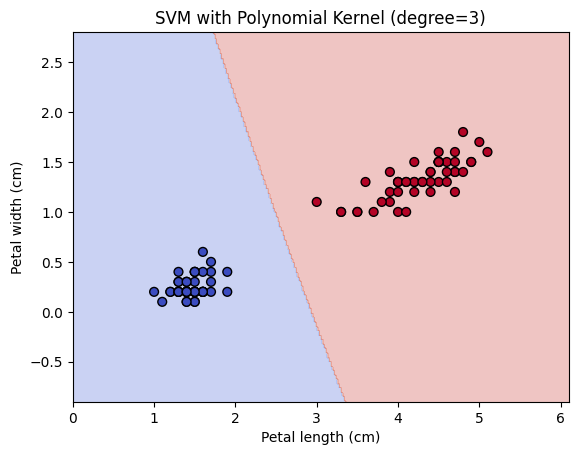

In [4]:
#Q24.Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load the Iris dataset and select only two features for visualization
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # Petal length and petal width
y = iris.target

# For clear visualization, select only two classes (setosa and versicolor)
X = X[y != 2]
y = y[y != 2]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM with polynomial kernel
clf = SVC(kernel='poly', degree=3, C=1.0)
clf.fit(X_train, y_train)

# Plotting decision boundary
def plot_decision_boundary(clf, X, y):
    # Create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Petal length (cm)')
    plt.ylabel('Petal width (cm)')
    plt.title('SVM with Polynomial Kernel (degree=3)')
    plt.show()

plot_decision_boundary(clf, X, y)


In [5]:
#Q25.: Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
clf = GaussianNB()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9737


In [6]:
#Q26.Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the 20 Newsgroups dataset (using a subset for speed; remove headers, footers, quotes)
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    newsgroups.data, newsgroups.target, test_size=0.2, random_state=42
)

# Convert text data to feature vectors
vectorizer = CountVectorizer(stop_words='english')
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Train Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_counts, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_counts)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Multinomial Naive Bayes Accuracy on 20 Newsgroups: {accuracy:.4f}")


Multinomial Naive Bayes Accuracy on 20 Newsgroups: 0.6753


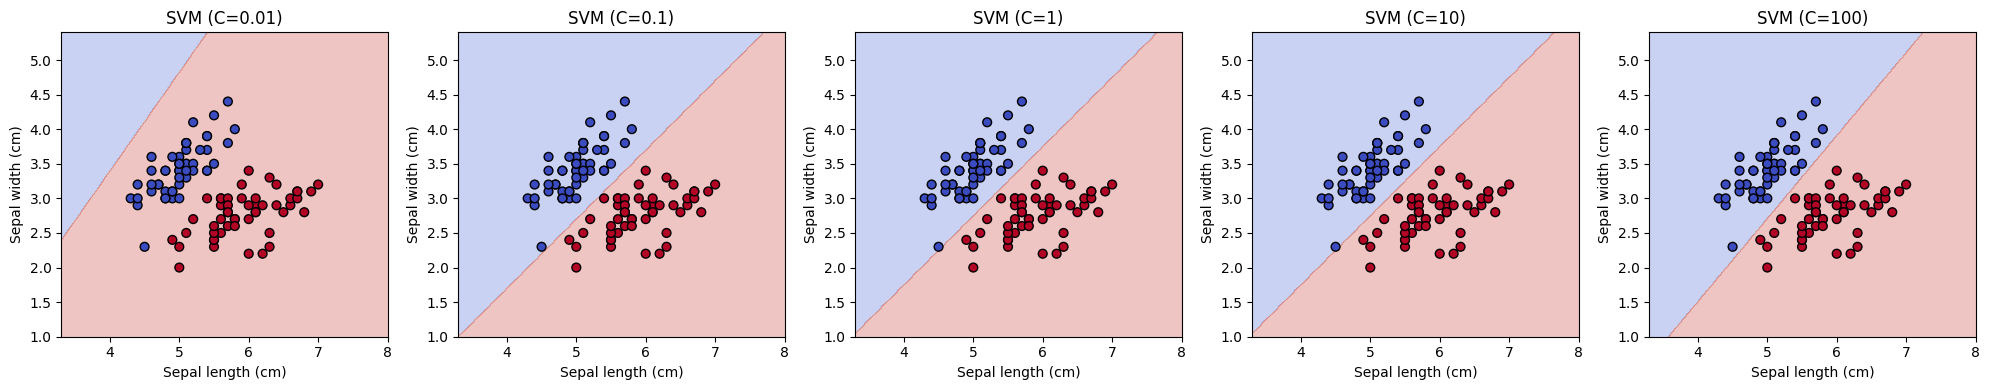

In [7]:
#Q27.Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load a dataset (Iris, using only two classes and two features for visualization)
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use sepal length and sepal width
y = iris.target

# Select only two classes for binary classification
X = X[y != 2]
y = y[y != 2]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def plot_decision_boundary(clf, X, y, ax, title):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', cmap=plt.cm.coolwarm)
    ax.set_xlabel('Sepal length (cm)')
    ax.set_ylabel('Sepal width (cm)')
    ax.set_title(title)

# Try different C values
C_values = [0.01, 0.1, 1, 10, 100]
fig, axes = plt.subplots(1, len(C_values), figsize=(20, 4))

for ax, C in zip(axes, C_values):
    clf = SVC(kernel='linear', C=C)
    clf.fit(X_train, y_train)
    plot_decision_boundary(clf, X, y, ax, f"SVM (C={C})")

plt.tight_layout()
plt.show()


In [8]:
#Q28.Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features=

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset with binary features
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    n_redundant=0,
    n_classes=2,
    random_state=42
)

# Binarize the features (convert to 0/1)
X_binary = (X > 0).astype(int)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_binary, y, test_size=0.2, random_state=42
)

# Initialize and train the Bernoulli Naive Bayes classifier
clf = BernoulliNB()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Bernoulli Naive Bayes Accuracy: {accuracy:.4f}")


Bernoulli Naive Bayes Accuracy: 0.7550


In [9]:
#Q29.Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data=

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load a dataset (e.g., Wine)
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train SVM on unscaled data
svm_unscaled = SVC(kernel='rbf', random_state=42)
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)

# 2. Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM on scaled data
svm_scaled = SVC(kernel='rbf', random_state=42)
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

# Compare results
print(f"SVM Accuracy without Scaling: {acc_unscaled:.4f}")
print(f"SVM Accuracy with Scaling:    {acc_scaled:.4f}")

if acc_scaled > acc_unscaled:
    print("Feature scaling improved the SVM's performance.")
elif acc_scaled < acc_unscaled:
    print("Feature scaling reduced the SVM's performance.")
else:
    print("Feature scaling made no difference in this case.")


SVM Accuracy without Scaling: 0.8056
SVM Accuracy with Scaling:    1.0000
Feature scaling improved the SVM's performance.


In [10]:
#Q30.Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing=

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print("GaussianNB predictions:", y_pred)
print("GaussianNB accuracy:", accuracy_score(y_test, y_pred))


GaussianNB predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
GaussianNB accuracy: 1.0


In [11]:
#Q31.Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel)=

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load a dataset (e.g., Iris)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}

# Initialize the SVM classifier
svc = SVC()

# Set up GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search.best_score_))

# Evaluate on the test set using the best estimator
best_svc = grid_search.best_estimator_
y_pred = best_svc.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy with best parameters: {:.4f}".format(test_accuracy))


Best parameters found: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Best cross-validation accuracy: 0.9583
Test set accuracy with best parameters: 1.0000


In [12]:
#Q32. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Create an imbalanced dataset
X, y = make_classification(
    n_samples=1000, n_features=10, n_informative=5, n_redundant=0,
    n_clusters_per_class=1, weights=[0.9, 0.1], flip_y=0, random_state=42
)

# Check class distribution
unique, counts = np.unique(y, return_counts=True)
print("Class distribution:", dict(zip(unique, counts)))

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train SVM without class weighting
svm_no_weight = SVC(kernel='rbf', random_state=42)
svm_no_weight.fit(X_train, y_train)
y_pred_no_weight = svm_no_weight.predict(X_test)
print("\nWithout class weighting:")
print("Accuracy:", accuracy_score(y_test, y_pred_no_weight))
print(classification_report(y_test, y_pred_no_weight))

# Train SVM with class weighting
svm_weighted = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_weighted.fit(X_train, y_train)
y_pred_weighted = svm_weighted.predict(X_test)
print("With class weighting:")
print("Accuracy:", accuracy_score(y_test, y_pred_weighted))
print(classification_report(y_test, y_pred_weighted))


Class distribution: {np.int64(0): np.int64(900), np.int64(1): np.int64(100)}

Without class weighting:
Accuracy: 0.985
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       180
           1       1.00      0.85      0.92        20

    accuracy                           0.98       200
   macro avg       0.99      0.93      0.96       200
weighted avg       0.99      0.98      0.98       200

With class weighting:
Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       180
           1       0.94      0.85      0.89        20

    accuracy                           0.98       200
   macro avg       0.96      0.92      0.94       200
weighted avg       0.98      0.98      0.98       200



In [ ]:
#Q33.Write a Python program to implement a Naïve Bayes classifier for spam detection using email data=

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Download and load the SMS Spam Collection dataset (or use your own email spam dataset)
# Dataset URL: https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
# For demonstration, we'll load from a local file named 'SMSSpamCollection'

# Read the dataset
df = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])

# Convert labels to binary values: ham=0, spam=1
df['label_num'] = df.label.map({'ham':0, 'spam':1})

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label_num'], test_size=0.2, random_state=42
)

# Convert text to feature vectors
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

# Predict and evaluate
y_pred = nb.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Spam Detection Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))


In [14]:
#Q34.Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy=

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
data = load_wine()
X = data.data
y = data.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM Classifier
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)

# Train Naïve Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

# Print and compare accuracies
print(f"SVM Classifier Accuracy:         {acc_svm:.4f}")
print(f"Naïve Bayes Classifier Accuracy: {acc_nb:.4f}")

if acc_svm > acc_nb:
    print("SVM performed better.")
elif acc_nb > acc_svm:
    print("Naïve Bayes performed better.")
else:
    print("Both classifiers performed equally.")


SVM Classifier Accuracy:         0.8056
Naïve Bayes Classifier Accuracy: 1.0000
Naïve Bayes performed better.


In [15]:
#Q35.= Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

# Load dataset
data = load_wine()
X = data.data
y = data.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 1. Train Naive Bayes on all features
nb_all = GaussianNB()
nb_all.fit(X_train, y_train)
y_pred_all = nb_all.predict(X_test)
acc_all = accuracy_score(y_test, y_pred_all)

# 2. Feature selection: select top 5 features
selector = SelectKBest(score_func=f_classif, k=5)
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)

# Train Naive Bayes on selected features
nb_sel = GaussianNB()
nb_sel.fit(X_train_sel, y_train)
y_pred_sel = nb_sel.predict(X_test_sel)
acc_sel = accuracy_score(y_test, y_pred_sel)

# Compare results
print(f"Naive Bayes Accuracy (all features):     {acc_all:.4f}")
print(f"Naive Bayes Accuracy (top 5 features):   {acc_sel:.4f}")

if acc_sel > acc_all:
    print("Feature selection improved the accuracy.")
elif acc_sel < acc_all:
    print("Feature selection reduced the accuracy.")
else:
    print("Feature selection made no difference in accuracy.")


Naive Bayes Accuracy (all features):     1.0000
Naive Bayes Accuracy (top 5 features):   0.9444
Feature selection reduced the accuracy.


In [16]:
#Q36.Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy=

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# SVM with One-vs-Rest (OvR) strategy
ovr_clf = OneVsRestClassifier(SVC(kernel='rbf', random_state=42))
ovr_clf.fit(X_train, y_train)
y_pred_ovr = ovr_clf.predict(X_test)
acc_ovr = accuracy_score(y_test, y_pred_ovr)

# SVM with One-vs-One (OvO) strategy
ovo_clf = OneVsOneClassifier(SVC(kernel='rbf', random_state=42))
ovo_clf.fit(X_train, y_train)
y_pred_ovo = ovo_clf.predict(X_test)
acc_ovo = accuracy_score(y_test, y_pred_ovo)

# Print and compare accuracies
print(f"SVM One-vs-Rest (OvR) Accuracy: {acc_ovr:.4f}")
print(f"SVM One-vs-One (OvO) Accuracy: {acc_ovo:.4f}")

if acc_ovr > acc_ovo:
    print("OvR performed better.")
elif acc_ovo > acc_ovr:
    print("OvO performed better.")
else:
    print("Both strategies performed equally.")


SVM One-vs-Rest (OvR) Accuracy: 0.7222
SVM One-vs-One (OvO) Accuracy: 0.7963
OvO performed better.


In [17]:
#Q37. Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train SVM with Linear kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred_linear)

# Train SVM with Polynomial kernel
svm_poly = SVC(kernel='poly', degree=3, random_state=42)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
acc_poly = accuracy_score(y_test, y_pred_poly)

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

# Print and compare accuracies
print(f"SVM Linear Kernel Accuracy:      {acc_linear:.4f}")
print(f"SVM Polynomial Kernel Accuracy:  {acc_poly:.4f}")
print(f"SVM RBF Kernel Accuracy:         {acc_rbf:.4f}")

# Optional: Compare which kernel performed best
accuracies = {
    "Linear": acc_linear,
    "Polynomial": acc_poly,
    "RBF": acc_rbf
}
best_kernel = max(accuracies, key=accuracies.get)
print(f"\nBest performing kernel: {best_kernel}")


SVM Linear Kernel Accuracy:      0.9649
SVM Polynomial Kernel Accuracy:  0.9415
SVM RBF Kernel Accuracy:         0.9357

Best performing kernel: Linear


In [18]:
#Q38.Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Define Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []

# Perform Stratified K-Fold Cross-Validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train SVM Classifier (using RBF kernel)
    clf = SVC(kernel='rbf', random_state=42)
    clf.fit(X_train, y_train)

    # Predict and compute accuracy
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Compute average accuracy
average_accuracy = np.mean(accuracies)
print(f"Stratified K-Fold Cross-Validation Accuracies: {accuracies}")
print(f"Average Accuracy: {average_accuracy:.4f}")


Stratified K-Fold Cross-Validation Accuracies: [0.9385964912280702, 0.8771929824561403, 0.8947368421052632, 0.9385964912280702, 0.9203539823008849]
Average Accuracy: 0.9139


In [19]:
#Q39.Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
data = load_wine()
X = data.data
y = data.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Default prior (learned from data)
nb_default = GaussianNB()
nb_default.fit(X_train, y_train)
y_pred_default = nb_default.predict(X_test)
acc_default = accuracy_score(y_test, y_pred_default)

# Custom prior: uniform distribution
n_classes = len(set(y))
uniform_prior = [1/n_classes] * n_classes
nb_uniform = GaussianNB(priors=uniform_prior)
nb_uniform.fit(X_train, y_train)
y_pred_uniform = nb_uniform.predict(X_test)
acc_uniform = accuracy_score(y_test, y_pred_uniform)

# Custom prior: skewed (e.g., favor class 0)
skewed_prior = [0.7, 0.2, 0.1]
nb_skewed = GaussianNB(priors=skewed_prior)
nb_skewed.fit(X_train, y_train)
y_pred_skewed = nb_skewed.predict(X_test)
acc_skewed = accuracy_score(y_test, y_pred_skewed)

print(f"Naive Bayes Accuracy (default prior): {acc_default:.4f}")
print(f"Naive Bayes Accuracy (uniform prior): {acc_uniform:.4f}")
print(f"Naive Bayes Accuracy (skewed prior): {acc_skewed:.4f}")

# Optional: Which prior performed best?
accuracies = {
    "Default": acc_default,
    "Uniform": acc_uniform,
    "Skewed": acc_skewed
}
best_prior = max(accuracies, key=accuracies.get)
print(f"\nBest performing prior: {best_prior}")


Naive Bayes Accuracy (default prior): 1.0000
Naive Bayes Accuracy (uniform prior): 1.0000
Naive Bayes Accuracy (skewed prior): 0.9722

Best performing prior: Default


In [20]:
#Q40.Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 1. Train SVM on all features
svm_all = SVC(kernel='linear', random_state=42)
svm_all.fit(X_train, y_train)
y_pred_all = svm_all.predict(X_test)
acc_all = accuracy_score(y_test, y_pred_all)

# 2. Recursive Feature Elimination (select top 10 features)
rfe = RFE(estimator=SVC(kernel='linear', random_state=42), n_features_to_select=10)
rfe.fit(X_train, y_train)
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train SVM on selected features
svm_rfe = SVC(kernel='linear', random_state=42)
svm_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = svm_rfe.predict(X_test_rfe)
acc_rfe = accuracy_score(y_test, y_pred_rfe)

# Compare results
print(f"SVM Accuracy (all features):     {acc_all:.4f}")
print(f"SVM Accuracy (RFE, 10 features): {acc_rfe:.4f}")

if acc_rfe > acc_all:
    print("RFE improved the accuracy.")
elif acc_rfe < acc_all:
    print("RFE reduced the accuracy.")
else:
    print("RFE made no difference in accuracy.")


SVM Accuracy (all features):     0.9561
SVM Accuracy (RFE, 10 features): 0.9737
RFE improved the accuracy.


In [21]:
#Q41.Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train SVM Classifier
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Evaluate using Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

# Optional: Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))


Precision: 0.9221
Recall:    1.0000
F1-Score:  0.9595

Classification Report:

              precision    recall  f1-score   support

   malignant       1.00      0.86      0.93        43
      benign       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [22]:
#Q42.Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss)

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict probabilities for the test set
y_pred_proba = nb.predict_proba(X_test)

# Compute Log Loss (Cross-Entropy Loss)
loss = log_loss(y_test, y_pred_proba)
print(f"Naive Bayes Log Loss (Cross-Entropy Loss): {loss:.4f}")


Naive Bayes Log Loss (Cross-Entropy Loss): 0.2037


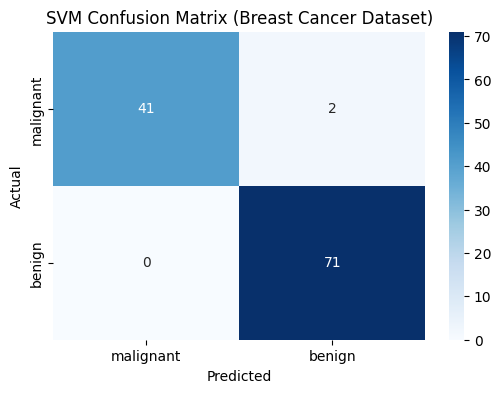

In [23]:
#Q43.Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM Classifier
svc_model = SVC()
svc_model.fit(X_train, y_train)

# Predict on test set
y_pred = svc_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix (Breast Cancer Dataset)')
plt.show()


In [24]:
#Q44.Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Load the diabetes dataset (regression)
X, y = load_diabetes(return_X_y=True)  # y is a continuous target[1]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train an SVM Regressor (SVR)
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Predict on the test set
y_pred = svr.predict(X_test)

# Evaluate using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"SVM Regressor Mean Absolute Error (MAE): {mae:.4f}")


SVM Regressor Mean Absolute Error (MAE): 56.0237


In [25]:
#Q45.Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

# Load the breast cancer dataset (binary classification)[1][4]
X, y = load_breast_cancer(return_X_y=True)

# Split into training and test sets[3][4]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict probabilities for the positive class
y_proba = nb.predict_proba(X_test)[:, 1]

# Evaluate using ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"Naive Bayes ROC-AUC Score: {roc_auc:.4f}")


Naive Bayes ROC-AUC Score: 0.9984


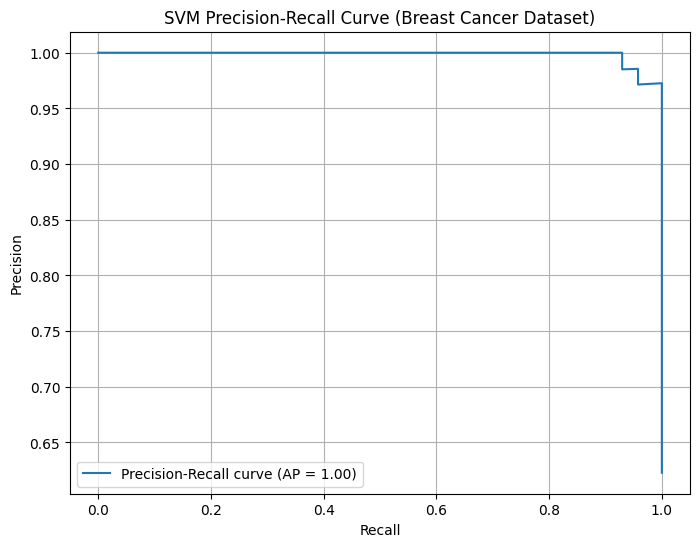

In [26]:
#Q46. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score

# Load the Breast Cancer dataset (binary classification)[1]
X, y = load_breast_cancer(return_X_y=True)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling for SVM performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM Classifier with probability estimates enabled
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

# Get predicted probabilities for the positive class
y_scores = svm.predict_proba(X_test_scaled)[:, 1]

# Compute precision-recall curve and average precision
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('SVM Precision-Recall Curve (Breast Cancer Dataset)')
plt.legend()
plt.grid(True)
plt.show()
